In [33]:
dataset_dict = {}
dataset_dict['MNIST'] = None
dataset_dict['Synthetic2'] = None

kernel_dict = {}
kernel_dict["Gaussian"] = None
kernel_dict["Laplace"] = None

size_list = [2000, 4000, 10000, 20000, 50000]

noise_list = [0, 1, 10]

In [34]:
import glob
files = glob.glob("../output/figure6*.txt")
files.sort()

filename = files[-1]

trainers = eval(open(filename, 'r').read())
trainers

{'D:MNIST K:Gaussian S:2000 N:0': {'dataset': 'MNIST',
  'kernel': 'Gaussian',
  'size': 2000,
  'noise': 0,
  'sgd_ce': 0.056400000000000006,
  'iterations': 3,
  'inv_ce': 0.0533,
  'inv_norm': 92.26589,
  'sgd_norm': 67.45984},
 'D:MNIST K:Gaussian S:2000 N:1': {'dataset': 'MNIST',
  'kernel': 'Gaussian',
  'size': 2000,
  'noise': 1,
  'sgd_ce': 0.0625,
  'iterations': 7,
  'inv_ce': 0.0631,
  'inv_norm': 98.48425,
  'sgd_norm': 84.37551},
 'D:MNIST K:Gaussian S:2000 N:10': {'dataset': 'MNIST',
  'kernel': 'Gaussian',
  'size': 2000,
  'noise': 10,
  'sgd_ce': 0.15580000000000005,
  'iterations': 22,
  'inv_ce': 0.161,
  'inv_norm': 149.48492,
  'sgd_norm': 130.65724},
 'D:MNIST K:Gaussian S:4000 N:0': {'dataset': 'MNIST',
  'kernel': 'Gaussian',
  'size': 4000,
  'noise': 0,
  'sgd_ce': 0.04179999999999995,
  'iterations': 4,
  'inv_ce': 0.0399,
  'inv_norm': 123.24263,
  'sgd_norm': 93.18335},
 'D:MNIST K:Gaussian S:4000 N:1': {'dataset': 'MNIST',
  'kernel': 'Gaussian',
  'size'

MNIST


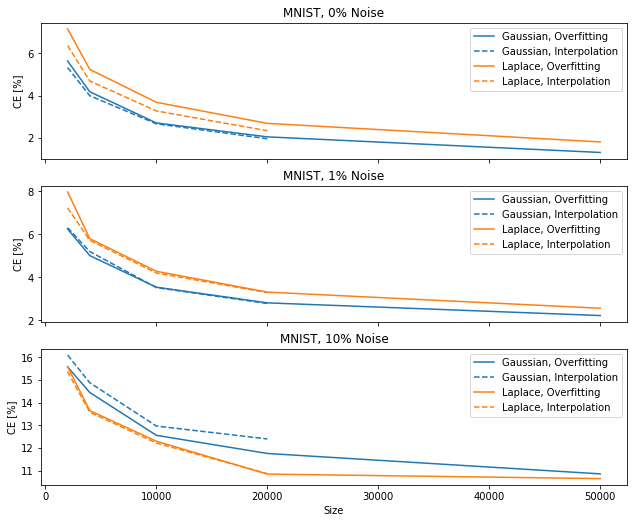

Synthetic2


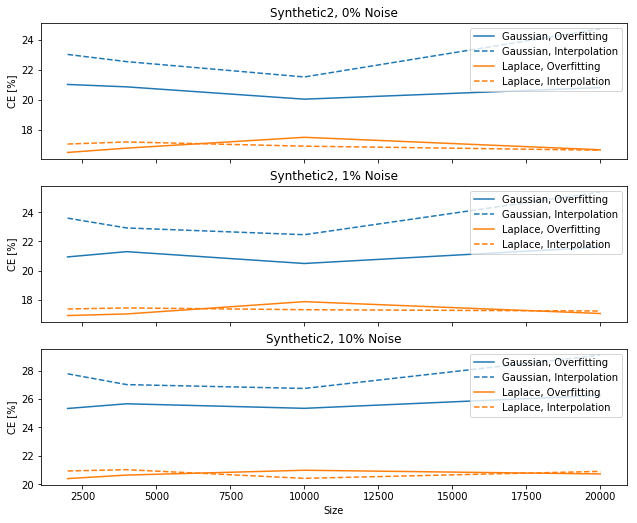

In [42]:
# Size vs Error

import matplotlib.pyplot as plt

for this_dataset in dataset_dict.keys():
    
    print(this_dataset)    
    
    fig, axs = plt.subplots(len(noise_list))
    ax = plt.gca()
    fig.set_size_inches(10.5, 8.5)
    
    for index, this_noise in enumerate(noise_list):

        ax.set_prop_cycle(None)
                
        for this_kernel in kernel_dict.keys():
            
            size = []
            inv = []
            sgd = []

            for name, trainer in trainers.items():  

                if trainer['dataset'] != this_dataset:
                    continue

                if trainer['kernel'] != this_kernel:
                    continue

                if trainer['noise'] != this_noise:
                    continue

                sgd.append(trainer['sgd_ce'] * 100)
                if 'inv_ce' in trainer:
                    inv.append(trainer['inv_ce'] * 100)
                size.append(trainer['size'])

            
            color = next(ax._get_lines.prop_cycler)['color']
            axs[index].plot(size, sgd, label=this_kernel + ', Overfitting', color=color) 
            axs[index].plot(size[:len(inv)], inv, '--', label=this_kernel + ', Interpolation', color=color) 

        axs[index].set_title(this_dataset + ', ' + str(this_noise) + '% Noise')
        axs[index].set_xlabel('Size')
        axs[index].set_ylabel('CE [%]')
        axs[index].legend(loc='upper right')
        
    import matplotlib2tikz
    filename = '../tikz/Figure6_' + this_dataset + '.tex'
    matplotlib2tikz.save(filename)    

    for ax in fig.get_axes():
        ax.label_outer()

    plt.show()

In [ ]:
# del trainers